# Assignment 4 : Perform Machine Learning Techniques

# 1. Installing the scikit-learn library

**Description: Python package for machine learning that provides tools for data preprocessing, model selection, and a variety of machine learning algorithms.**

In [2]:
# Install scikit-learn
!pip install scikit-learn

# 2. Importing Libraries

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

# 3. Fetching the dataset.






In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


**Loading data from a CSV file named train.csv into a pandas DataFrame (df), allowing for easy data manipulation and analysis.**

In [37]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Titanic Dataset: It contains information on the passengers of the Titanic, including those who survived and those who did not.**

**Key Features in the Titanic Dataset:**

1. Survived: Indicates if the passenger survived (1) or not (0). This is the target variable.

2. Pclass: The ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
Name: The full name of the passenger.

3. Sex: Gender of the passenger.

4. Age: Age of the passenger in years.

5. SibSp: Number of siblings or spouses aboard with the passenger.

6. Parch: Number of parents or children aboard with the passenger.

7. Ticket: Ticket number.

8. Fare: The fare paid by the passenger.

9. Cabin: Cabin number.

10. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# 4. Data Preprocessing

**I. Removing all rows with missing values from the DataFrame.**

In [38]:
# Handling missing values
df.dropna(inplace=True)

II. Removing duplicate rows from the DataFrame.

In [39]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Displaying data frame after preprocessing
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


# 5. Converting Categorical Features
**Description: Convert categorical features to dummy variables with pandas to enable machine learning algorithms to process them as numerical inputs.**

In [10]:
# Using LabelEncoder for binary 'sex' column
from sklearn.preprocessing import LabelEncoder

In [44]:
# Encode categorical data ('sex' column) to numerical values
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


# 6. Splitting the data into Input(X) and Output(y)

In [12]:
# Define the input (X) and output (y)
X = df[['Age', 'Sex', 'Pclass']]
y = df['Survived']

In [13]:
# Displaying X and y
X

,Age,Sex,Pclass
1,38.0,0,1
3,35.0,0,1
6,54.0,1,1
10,4.0,0,3
11,58.0,0,1
...,...,...,...
871,47.0,0,1
872,33.0,1,1
879,56.0,0,1
887,19.0,0,1


In [14]:
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


# 7. Split data into training and test sets (80% train, 20% test)

In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Importing Supervised Learning Model

# Supervised Learning

**Definition: Supervised learning involves training a model on labeled data, where the target variable is known. The model learns to map inputs to the correct output.**

# I. Logistic Regression for Classification
**Description: Logistic Regression is a statistical model used for binary classification that predicts the probability of a categorical dependent variable based on one or more independent variables.**


In [16]:
# Importing a supervised learning model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

**Initializing a logistic regression model, and model.fit(X_train, y_train) trains the model on the training data (X_train and y_train).**

In [17]:
# Loading and Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**By executing y_pred = model.predict(X_test), the trained logistic regression model is applied to make predictions on the test dataset (X_test).**

In [18]:
# Make Predictions
y_pred = model.predict(X_test)

In [19]:
results = pd.DataFrame({'Age': X_test['Age'],
                        'Sex': X_test['Sex'],
                        'Pclass': X_test['Pclass'],
                        'Survived': y_pred})
results

,Age,Sex,Pclass,Survived
118,24.00,1,1,1
251,29.00,0,3,1
742,21.00,0,1,1
544,50.00,1,1,0
712,48.00,1,1,0
96,71.00,1,1,0
139,24.00,1,1,1
337,41.00,0,1,1
577,39.00,0,1,1
492,55.00,1,1,0


# Evaluation of the Model

In [20]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 72.97%


# II. Linear Regression

**Description: Linear regression models the relationship between a dependent variable and an independent variable by fitting a straight line that minimizes the error between predicted and actual values, such as predicting house prices based on square footage.**

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# Define the input (X) and output (y)
X = df[['Age', 'Sex', 'Pclass']]
y = df['Fare']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [26]:
results = pd.DataFrame({'Age': X_test['Age'],
                        'Sex': X_test['Sex'],
                        'Pclass': X_test['Pclass'],
                        'Actual Fare': y_test,
                        'Predicted Fare': y_pred})
results.head()

,Age,Sex,Pclass,Actual Fare,Predicted Fare
118,24.0,1,1,247.5208,90.345197
251,29.0,0,3,10.4625,-7.306233
742,21.0,0,1,262.3750,110.556635
544,50.0,1,1,106.4250,68.650385
712,48.0,1,1,52.0000,70.319217


In [27]:
# Evaluating the model
accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 23.84%


# 9. Importing Unsupervised Learning Model

#  Unsupervised Learning

**Definition: Unsupervised learning works with unlabeled data, aiming to find patterns or groupings within the data.**

# I. Clustering

**Definition: Clustering is an unsupervised learning task that groups data points into clusters based on similarity, without requiring labeled data, to uncover inherent patterns in the data.**

In [28]:
# Importing an unsupervised learning model (K-Means Clustering)
from sklearn.cluster import KMeans

In [29]:
# Loading K-Means Clustering Model
kmeans = KMeans(n_clusters=2)

In [31]:
# Perform one-hot encoding on the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], prefix=['Embarked'])

In [32]:
# Now select only the numeric columns for clustering
df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked_Q', 'Embarked_S']]

In [33]:
# Training the model
kmeans.fit(df)

KMeans(n_clusters=2)

In [34]:
# Adding the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

In [35]:
# Displaying the clustered data
df

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,Cluster
1,1,38.0,1,0,71.2833,0,False,False,0
3,1,35.0,1,0,53.1000,0,False,True,0
6,1,54.0,0,0,51.8625,1,False,True,0
10,3,4.0,1,1,16.7000,0,False,True,0
11,1,58.0,0,0,26.5500,0,False,True,0
...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,0,False,True,0
872,1,33.0,0,0,5.0000,1,False,True,0
879,1,56.0,0,1,83.1583,0,False,False,0
887,1,19.0,0,0,30.0000,0,False,True,0


# II. Dimensionality Reduction

Definition: Dimensionality reduction is a technique that reduces the number of input variables in a dataset while preserving essential information, simplifying analysis and visualization.

In [46]:
# Drop irrelevant or non-informative columns for PCA
df_dropped = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

**'Name' is dropped because it contains unique passenger names and does not directly contribute to the model's predictive power.**

**'Ticket' is dropped because it contains unique ticket identifiers that don't offer valuable insights for prediction.**

**'Cabin' is dropped due to a high number of missing values and sparse data, which would make it difficult to use effectively for PCA.**

**These columns are not useful for dimensionality reduction, so they are removed to focus on features that contain more meaningful variance.**

In [47]:
df_dropped

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,0,38.0,1,0,71.2833
3,4,1,1,0,35.0,1,0,53.1000
6,7,0,1,1,54.0,0,0,51.8625
10,11,1,3,0,4.0,1,1,16.7000
11,12,1,1,0,58.0,0,0,26.5500
...,...,...,...,...,...,...,...,...
871,872,1,1,0,47.0,1,1,52.5542
872,873,0,1,1,33.0,0,0,5.0000
879,880,1,1,0,56.0,0,1,83.1583
887,888,1,1,0,19.0,0,0,30.0000


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data

**Definition: Standardizing the data involves scaling features to have a mean of zero and a standard deviation of one, ensuring consistency in units across variables.**

In [48]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dropped)

In [49]:
scaled_data

array([[-1.84013507,  0.6984303 , -0.37225618, ...,  0.83362754,
        -0.63172982, -0.0971798 ],
       [-1.83201742,  0.6984303 , -0.37225618, ...,  0.83362754,
        -0.63172982, -0.3359971 ],
       [-1.81984093, -1.43178211, -0.37225618, ..., -0.7230443 ,
        -0.63172982, -0.35225028],
       ...,
       [ 1.72351585,  0.6984303 , -0.37225618, ..., -0.7230443 ,
         0.69708118,  0.05878503],
       [ 1.75598648,  0.6984303 , -0.37225618, ..., -0.7230443 ,
        -0.63172982, -0.63938976],
       [ 1.76410413,  0.6984303 , -0.37225618, ..., -0.7230443 ,
        -0.63172982, -0.63938976]])

In [50]:
# Applying PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [51]:
pd.DataFrame(pca_data).head()

,0,1
0,0.666036,0.169640
1,0.639030,0.353613
2,-2.190630,-0.900554
3,1.611654,3.374230
4,-0.652402,0.392789


In [52]:
# Checking the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:", explained_variance_ratio)

Explained Variance Ratio for each Principal Component: [0.25095267 0.18454736]


**First Principal Component (PC1): The first principal component explains 25.10% of the variance in the data.**

**Second Principal Component (PC2): The second principal component explains 18.45% of the variance in the data.**

**The first two principal components explain approximately 43.56% of the total variance (i.e., 0.25095267 + 0.18454736).**

In [53]:
# Adding the PCA results to the DataFrame
df_dropped['PCA_1'] = pca_data[:, 0]
df_dropped['PCA_2'] = pca_data[:, 1]

In [54]:
df_dropped

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,PCA_1,PCA_2
1,2,1,1,0,38.0,1,0,71.2833,0.666036,0.169640
3,4,1,1,0,35.0,1,0,53.1000,0.639030,0.353613
6,7,0,1,1,54.0,0,0,51.8625,-2.190630,-0.900554
10,11,1,3,0,4.0,1,1,16.7000,1.611654,3.374230
11,12,1,1,0,58.0,0,0,26.5500,-0.652402,0.392789
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,47.0,1,1,52.5542,0.974033,-0.146146
872,873,0,1,1,33.0,0,0,5.0000,-1.842805,-0.079729
879,880,1,1,0,56.0,0,1,83.1583,0.342838,-0.132985
887,888,1,1,0,19.0,0,0,30.0000,0.416911,1.324833


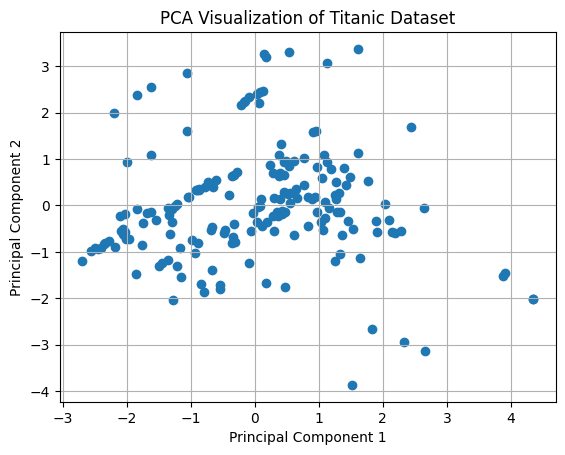

In [55]:
# Visualize the PCA results
import matplotlib.pyplot as plt

plt.scatter(df_dropped['PCA_1'], df_dropped['PCA_2'])
plt.title('PCA Visualization of Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# III. Association Rules

**Definition: Association rule mining is a technique used to discover relationships between items in large datasets, commonly applied in market basket analysis to identify frequently co-occurring products.**

In [56]:
from google.colab import files
uploaded = files.upload()

Saving imdb.csv to imdb.csv


In [57]:
df = pd.read_csv('imdb.csv')

In [58]:
df.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",8.3,46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",125.0
2,2,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,54.0
3,3,The Rise and Fall of El Chapo,2016.0,tv movie,['Documentary'],6.9,42.0,['United States'],NaN,NaN,NaN,NaN,NaN,85.0
4,4,Sick - IMDb,NaN,NaN,['Thriller'],NaN,NaN,['United States'],NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",NaN


In [59]:
df.shape

(9826, 14)

**Netflix Prize Dataset: The Netflix Prize dataset, originally released by Netflix as part of their competition to improve their recommendation system, contains information about users, movies (or shows), and ratings.**

**Key Features in the Netflix Prize Dataset:**

Title: The name of the movie or show (e.g., "Inception").

Year: The year the movie or show was released (e.g., 2010).

Kind: The type of content (e.g., movie, TV series, documentary).

Genre: The category of the show or movie (e.g., Action, Comedy, Drama).

Rating: The average rating given to the show or movie by users (e.g., 7.8/10).

Vote: The number of user votes or ratings the movie/show has received (e.g., 150,000 votes).

Country: The country or countries where the movie/show was produced or distributed (e.g., USA, UK).

Language: The primary language(s) in which the movie/show is presented (e.g., English, Spanish).

Cast: The main actors or actresses featured in the movie or show (e.g., "Leonardo DiCaprio").

Director: The person or people who directed the movie or show (e.g., "Christopher Nolan").

Composer: The individual(s) responsible for the film's music or score (e.g., "Hans Zimmer").

Writer: The writer(s) of the script or screenplay (e.g., "Quentin Tarantino").

Runtime: The total duration of the movie or show, usually in minutes (e.g., 120 minutes).

In [60]:
df = df.drop(df.columns[0], axis=1)
df = df[['title', 'genre']]
df.head()

,title,genre
0,Dinosaur Planet,"['Documentary', 'Animation', 'Family']"
1,Character,"['Crime', 'Horror', 'Thriller']"
2,Get Up and Dance!,['Family']
3,The Rise and Fall of El Chapo,['Documentary']
4,Sick - IMDb,['Thriller']


In [61]:
df.shape

(9826, 2)

In [62]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Handling missing values
df.dropna(inplace=True)

In [ ]:
df.shape

In [68]:
# Remove the single quotes from the genre column
df['genre'] = df['genre'].str.replace("'", "", regex=False)

In [69]:
df['genre'] = df['genre'].str.strip('[]')

In [70]:
df.head()

,title,genre
0,Dinosaur Planet,"Documentary, Animation, Family"
1,Character,"Crime, Horror, Thriller"
2,Get Up and Dance!,Family
3,The Rise and Fall of El Chapo,Documentary
4,Sick - IMDb,Thriller


In [71]:
df.shape

(9733, 2)

In [72]:
# Split the 'genre' column into lists of genres
df['Genres_split'] = df['genre'].str.split(', ')

In [73]:
df['Genres_split'].head()

,Genres_split
0,"[Documentary, Animation, Family]"
1,"[Crime, Horror, Thriller]"
2,[Family]
3,[Documentary]
4,[Thriller]


In [74]:
df['Genres_split'].shape

(9733,)

In [75]:
df.head()

,title,genre,Genres_split
0,Dinosaur Planet,"Documentary, Animation, Family","[Documentary, Animation, Family]"
1,Character,"Crime, Horror, Thriller","[Crime, Horror, Thriller]"
2,Get Up and Dance!,Family,[Family]
3,The Rise and Fall of El Chapo,Documentary,[Documentary]
4,Sick - IMDb,Thriller,[Thriller]


**`all_genres` will contain a set of all unique genres across all movies, with no duplicates.**

In [76]:
# Create a set of all unique genres across all movies
all_genres = set([genre for genres in df['Genres_split'] for genre in genres])

In [77]:
print(all_genres)

{'Romance', 'Comedy', 'History', 'Thriller', 'Talk-Show', 'Biography', 'Sport', 'Action', 'Crime', 'Drama', 'Fantasy', 'Adventure', 'Musical', 'Family', 'Western', 'Music', 'Horror', 'Sci-Fi', 'Short', 'Reality-TV', 'Mystery', 'Film-Noir', 'Documentary', 'Game-Show', 'Animation', 'War', 'News'}


In [78]:
print(len(all_genres))

27


In [79]:
# One-hot encode the genres in the DataFrame
for genre in all_genres:
    df[genre] = df['Genres_split'].apply(lambda x: 1 if genre in x else 0)

**New columns: A column is created for each genre in all_genres.**

**Binary values: Each row will have 1 for the genres present and 0 for the genres absent.**


In [80]:
df.head()

,title,genre,Genres_split,Romance,Comedy,History,Thriller,Talk-Show,Biography,Sport,...,Sci-Fi,Short,Reality-TV,Mystery,Film-Noir,Documentary,Game-Show,Animation,War,News
0,Dinosaur Planet,"Documentary, Animation, Family","[Documentary, Animation, Family]",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,Character,"Crime, Horror, Thriller","[Crime, Horror, Thriller]",0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Get Up and Dance!,Family,[Family],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Rise and Fall of El Chapo,Documentary,[Documentary],0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Sick - IMDb,Thriller,[Thriller],0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df.shape

(9733, 30)

In [82]:
df.drop(['title', 'genre', 'Genres_split'], axis=1).head()

,Romance,Comedy,History,Thriller,Talk-Show,Biography,Sport,Action,Crime,Drama,...,Sci-Fi,Short,Reality-TV,Mystery,Film-Noir,Documentary,Game-Show,Animation,War,News
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Apriori algorithm

**Definition: It is a classical data mining algorithm used to find frequent itemsets in transactional datasets and derive association rules, where the itemsets appear frequently together in transactions.**

In [83]:
# Apply Apriori to find frequent itemsets with a minimum support of 0.005
frequent_itemsets = apriori(df[list(all_genres)], min_support=0.005, use_colnames=True)

**Convert `all_genres` to a list before passing to `apriori`**

**The code applies the Apriori algorithm to find frequent itemsets of movie genres, with a minimum support of 0.5%, using one-hot encoded genre columns from the DataFrame.**

In [84]:
# Display frequent itemsets
print("\nFrequent Itemsets:")
frequent_itemsets


Frequent Itemsets:


,support,itemsets
0,0.169218,(Romance)
1,0.284188,(Comedy)
2,0.049728,(History)
3,0.161204,(Thriller)
4,0.018083,(Talk-Show)
...,...,...
342,0.005959,"(Drama, Thriller, Horror, Mystery, Sci-Fi)"
343,0.005137,"(Fantasy, Thriller, Horror, Mystery, Sci-Fi)"
344,0.006473,"(Animation, Fantasy, Adventure, Sci-Fi, Action)"
345,0.005240,"(Drama, Fantasy, Horror, Mystery, Sci-Fi)"


**The `association_rules()` function generates association rules from frequent itemsets, evaluating them based on the lift metric, with a minimum lift of 1.0 and an optional constraint on the number of items per rule.**

In [85]:
# Generate association rules with a minimum lift of 1.0
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=2)

In [86]:
# Display the association rules
print("\nAssociation Rules:")
rules[['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift']]


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(Comedy),(Romance),0.284188,0.169218,0.073256,0.257773,1.523318
1,(Romance),(Comedy),0.169218,0.284188,0.073256,0.432908,1.523318
2,(Drama),(Romance),0.417857,0.169218,0.123292,0.295058,1.743654
3,(Romance),(Drama),0.169218,0.417857,0.123292,0.728597,1.743654
4,(Fantasy),(Romance),0.092983,0.169218,0.018802,0.202210,1.194966
...,...,...,...,...,...,...,...
1971,(Fantasy),"(Drama, Thriller, Horror, Mystery, Sci-Fi)",0.092983,0.005959,0.005034,0.054144,9.085864
1972,(Thriller),"(Drama, Fantasy, Horror, Mystery, Sci-Fi)",0.161204,0.005240,0.005034,0.031230,5.960047
1973,(Horror),"(Drama, Fantasy, Thriller, Mystery, Sci-Fi)",0.095962,0.005445,0.005034,0.052463,9.634298
1974,(Mystery),"(Drama, Fantasy, Thriller, Horror, Sci-Fi)",0.083736,0.005240,0.005034,0.060123,11.474005


# Key Terms:
**Antecedents:** Items or conditions found in the dataset that are used to predict other items (the "if" part of the rule).

**Consequents:** Items that are predicted to appear when the antecedents are present (the "then" part of the rule).

**Antecedent support:** The frequency (probability) of the antecedent appearing in the dataset.

**Consequent support:** The frequency (probability) of the consequent appearing in the dataset.

**Support:** The joint frequency (probability) of both the antecedent and consequent appearing together in the dataset.

**Confidence:** The probability that the consequent appears given the antecedent is present.

**Lift:** The ratio of the observed support to the expected support if antecedent and consequent were independent.

# Key Take Aways:


1.   If War is present, there is a 35.5% chance that History will also be present, and the likelihood of both appearing together is 1.35% (Lift: 7.14).
2.   If History is present, there is a 27.1% chance that War will also be present, and the likelihood of both appearing together is 1.35% (Lift: 7.14).
3.   If War is present, there is a 25.7% chance that Action will also be present, and the likelihood of both appearing together is 0.98% (Lift: 1.54).
4.  If Action is present, there is a 5.8% chance that War will also be present, and the likelihood of both appearing together is 0.98% (Lift: 1.54).
5.  If War is present, there is a 16.8% chance that Adventure will also be present, and the likelihood of both appearing together is 0.64% (Lift: 1.41).
6.  If Action is present, there is a 12.4% chance that Crime will also be present, and the likelihood of both appearing together is 0.34% (Lift: 1.53).
7.  If Crime is present, there is a 20.5% chance that Action will also be present, and the likelihood of both appearing together is 0.34% (Lift: 1.53).



# 10. Importing Reinforcement Learning Model

# Reinforcement Learning
**Definition: Reinforcement Learning (RL) is a type of machine learning where an agent learns to make decisions by interacting with an environment to maximize cumulative rewards through trial and error.**

# Q-Learning:
**Definition: Q-learning is a model-free algorithm where an agent learns action values in different states by updating a Q-table using the Bellman equation to maximize rewards.**

In [87]:
import numpy as np

**Initializing a 4x4 grid with a Q-table, where each cell contains a 1D array of zeros representing Q-values for four possible actions (up, down, left, right).**

In [88]:
# Grid size (4x4 grid)
grid_size = 4
q_table = np.zeros((grid_size, grid_size, 4))  # 4 possible actions (up, down, left, right)

**Setting the constants for a reinforcement learning algorithm: learning rate (`lr`), discount factor (`gamma`), exploration rate (`eps`), and defining the possible actions (up, down, left, right) with their corresponding coordinate changes.**

In [89]:
# Constants
lr, gamma, eps = 0.1, 0.9, 1.0  # Learning rate, discount factor, epsilon for exploration
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # up, down, left, right

**Defining the reward function: the goal is at position (3, 3) with a reward of 1 for reaching it, and a small penalty of -0.1 for each move to encourage faster goal completion.**

In [90]:
# Reward function
goal = (3, 3)  # Goal position (bottom-right corner)
reward_goal = 1  # Reward for reaching the goal
reward_non_goal = -0.1  # Small penalty for each move to encourage reaching the goal quickly

**Training an agent using Q-learning in a 4x4 grid to reach a goal. The agent explores and exploits based on epsilon-greedy, updates Q-values after each action, and gradually decays epsilon to favor exploitation. The Q-table is printed every 10 episodes.**

In [91]:
# Training the agent
for episode in range(100):
    pos = (0, 0)  # Start from the top-left corner
    while pos != goal:
        # Choose action: explore or exploit
        action = np.random.choice(4) if np.random.rand() < eps else np.argmax(q_table[pos])

        # Calculate next position
        next_pos = (pos[0] + actions[action][0], pos[1] + actions[action][1])

        # Check boundaries
        if 0 <= next_pos[0] < grid_size and 0 <= next_pos[1] < grid_size:
            pos = next_pos

        # Reward and Q-value update
        reward = reward_goal if pos == goal else reward_non_goal
        q_table[pos[0], pos[1], action] += lr * (reward + gamma * np.max(q_table[pos]) - q_table[pos[0], pos[1], action])

    # Decay epsilon (reduce randomness)
    eps *= 0.995

    # Ensure Q-values are zero at the goal position to stop unnecessary updates
    q_table[goal[0], goal[1]] = np.zeros(4)

# Print Q-table every 10 episodes
    if (episode + 1) % 10 == 0:
        print(f"\nQ-table after episode {episode + 1}:")
        print(q_table)


Q-table after episode 10:
[[[-0.09835768  0.         -0.09903023  0.        ]
  [-0.07175705 -0.09202336 -0.09015229  0.        ]
  [-0.07175705 -0.07712321 -0.09202336  0.        ]
  [ 0.         -0.09418503 -0.09418503  0.        ]]

 [[-0.09953616  0.         -0.06861894 -0.09113706]
  [-0.10370986 -0.16717899 -0.14008061 -0.15666124]
  [-0.13689625 -0.13893838 -0.11559545 -0.10691917]
  [ 0.         -0.09690968 -0.05695328 -0.07712321]]

 [[-0.09418503  0.         -0.06125795 -0.07458134]
  [-0.1080434  -0.13609607 -0.10165771 -0.12048264]
  [-0.036829   -0.08701167 -0.06795097 -0.0968988 ]
  [ 0.         -0.08499054  0.         -0.07458134]]

 [[-0.08332282  0.          0.         -0.08499054]
  [-0.0468559  -0.06125795  0.         -0.08784233]
  [ 0.         -0.05695328  0.         -0.07712321]
  [ 0.          0.          0.          0.        ]]]

Q-table after episode 20:
[[[-0.0999871   0.         -0.09999238  0.        ]
  [-0.09576088 -0.09966186 -0.0998821   0.        ]
  

**Printing the best action and corresponding Q-values for each position in the grid, showing the learned behavior of the agent after training.**

In [92]:
# Output the best actions and Q-values for each position
print("\nFinal best actions and Q-values:")
action_names = ["up", "down", "left", "right"]  # Action names corresponding to indices
for i in range(grid_size):
    for j in range(grid_size):
        print(f"\nPosition ({i}, {j}):")

        if (i, j) == goal:
            # For the goal position, there are no actions (since it's the terminal state)
            print(f"  Best Action: No Action, Q-value: 0.00")
        else:
            # Print Q-values for each action at the current position
            for action in range(4):
                print(f"  Action: {action_names[action]} -> Q-value: {q_table[i, j, action]:.2f}")

            # Get the best action and its Q-value
            best_action = np.argmax(q_table[i, j])
            print(f"  Best Action: {action_names[best_action]}, Q-value: {q_table[i, j, best_action]:.2f}")


Final best actions and Q-values:

Position (0, 0):
  Action: up -> Q-value: -0.10
  Action: down -> Q-value: 0.00
  Action: left -> Q-value: -0.10
  Action: right -> Q-value: 0.00
  Best Action: down, Q-value: 0.00

Position (0, 1):
  Action: up -> Q-value: -0.10
  Action: down -> Q-value: -0.10
  Action: left -> Q-value: -0.10
  Action: right -> Q-value: 0.00
  Best Action: right, Q-value: 0.00

Position (0, 2):
  Action: up -> Q-value: -0.10
  Action: down -> Q-value: -0.10
  Action: left -> Q-value: -0.10
  Action: right -> Q-value: 0.00
  Best Action: right, Q-value: 0.00

Position (0, 3):
  Action: up -> Q-value: 0.00
  Action: down -> Q-value: -0.10
  Action: left -> Q-value: -0.10
  Action: right -> Q-value: 0.00
  Best Action: up, Q-value: 0.00

Position (1, 0):
  Action: up -> Q-value: -0.10
  Action: down -> Q-value: 0.00
  Action: left -> Q-value: -0.10
  Action: right -> Q-value: -0.10
  Best Action: down, Q-value: 0.00

Position (1, 1):
  Action: up -> Q-value: -0.84
  Ac